In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
veri=pd.read_csv("Iris_train.csv")
veri.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
veri.shape

(130, 7)

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     130 non-null    int64  
 1   Id             130 non-null    int64  
 2   SepalLengthCm  130 non-null    float64
 3   SepalWidthCm   130 non-null    float64
 4   PetalLengthCm  130 non-null    float64
 5   PetalWidthCm   130 non-null    float64
 6   Species        130 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 7.2+ KB


In [5]:
veri.describe()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,64.500000,65.500000,5.727692,3.056923,3.494615,1.066923
std,37.671829,37.671829,0.802517,0.451344,1.744418,0.726507
min,0.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,32.250000,33.250000,5.100000,2.800000,1.500000,0.200000
50%,64.500000,65.500000,5.650000,3.000000,4.000000,1.250000
75%,96.750000,97.750000,6.300000,3.375000,4.800000,1.600000
max,129.000000,130.000000,7.700000,4.400000,6.900000,2.500000


In [6]:
veri.isnull()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False


In [7]:
data = veri.drop_duplicates(subset ="Species",)
data

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
veri.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     30
dtype: int64

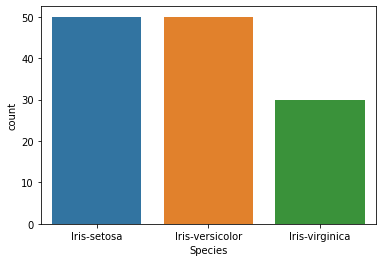

In [9]:
#Türler için bir sayım grafiği 
sns.countplot(x='Species', data=veri, )
plt.show()

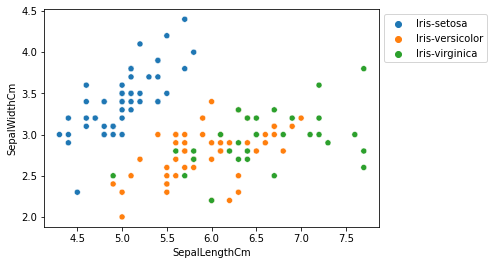

In [10]:
#Sepal Uzunluğu ve Sepal Genişliğini Karşılaştırma
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=veri, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

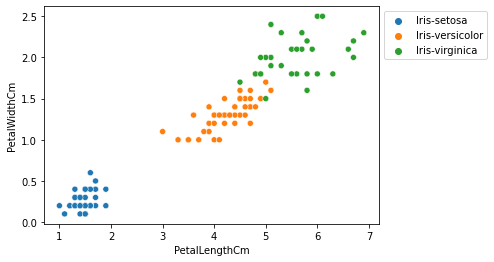

In [11]:
#Petal Uzunluğu ve Petal Genişliğini Karşılaştırma
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=veri, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

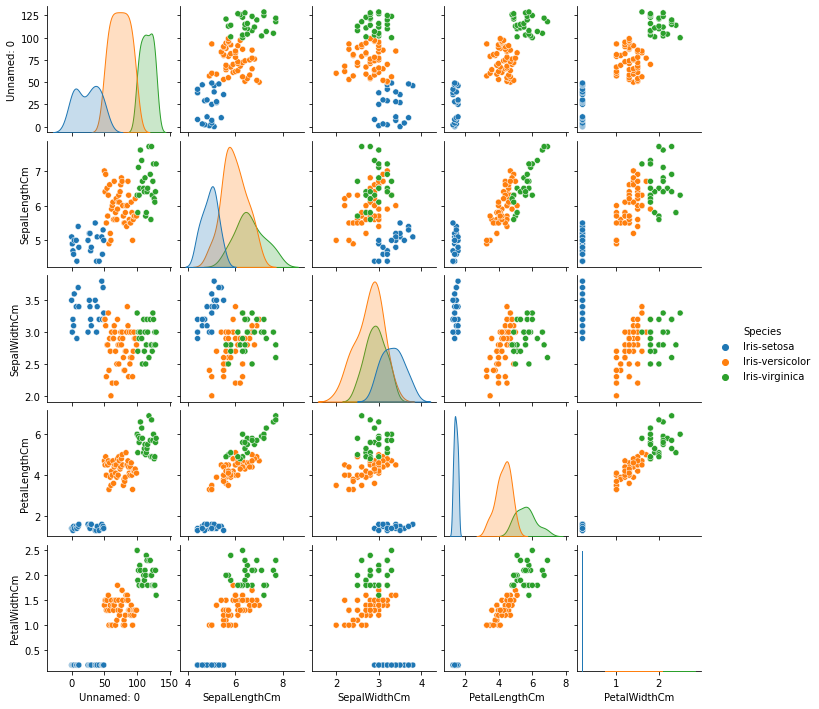

In [30]:
sns.pairplot(veri.drop(['Id'], axis = 1), 
             hue='Species', height=2)

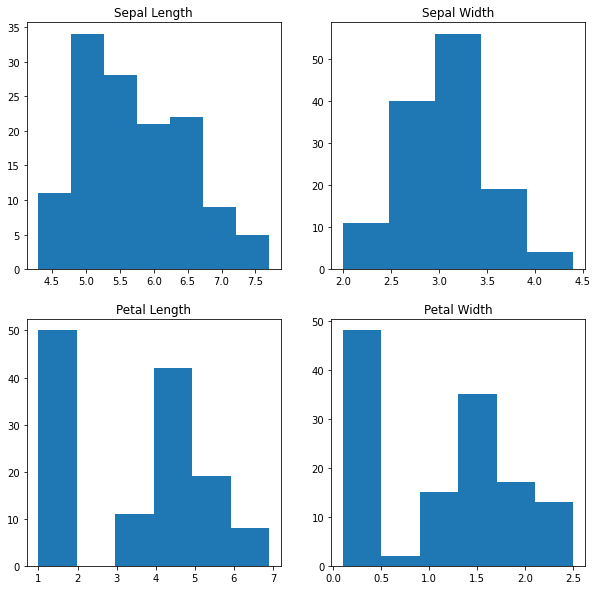

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(veri['SepalLengthCm'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(veri['SepalWidthCm'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(veri['PetalLengthCm'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(veri['PetalWidthCm'], bins=6);

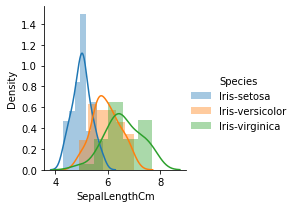

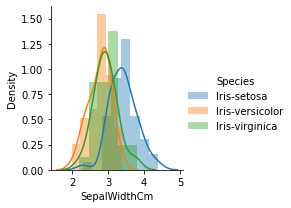

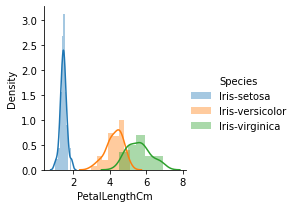

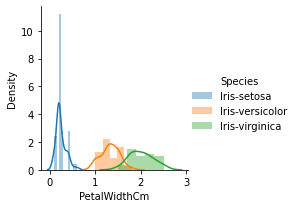

In [14]:
plot = sns.FacetGrid(veri, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
  
plot = sns.FacetGrid(veri, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
  
plot = sns.FacetGrid(veri, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
  
plot = sns.FacetGrid(veri, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
  
plt.show()

In [15]:
data.corr(method='pearson')

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Unnamed: 0,1.000000,1.000000,0.624413,-0.654654,0.969909,0.999685
Id,1.000000,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.999685,0.643817,-0.673417,0.975713,1.000000


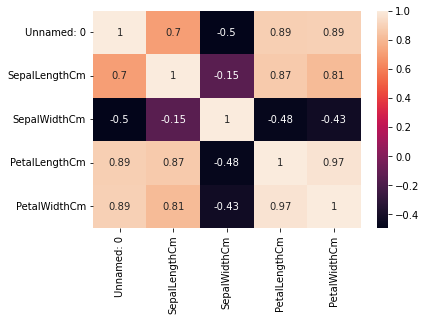

In [16]:
sns.heatmap(veri.corr(method='pearson').drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True);
  
plt.show()

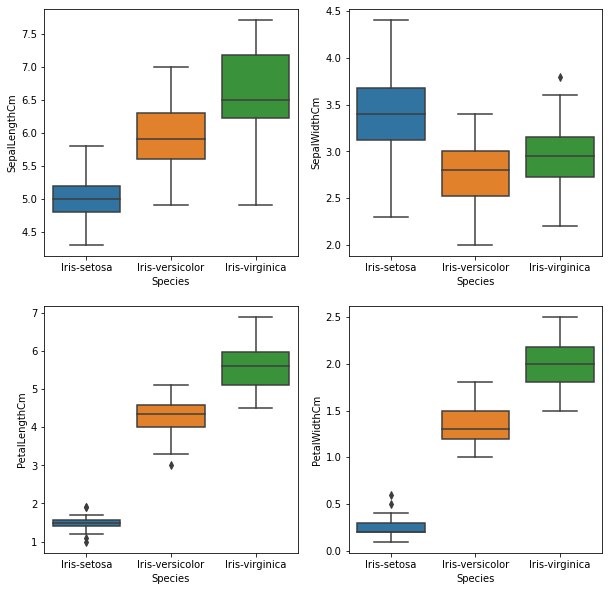

In [17]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=veri)
  
plt.figure(figsize=(10,10))
      
plt.subplot(221)
graph('SepalLengthCm')
  
plt.subplot(222)
graph('SepalWidthCm')
  
plt.subplot(223)
graph('PetalLengthCm')
  
plt.subplot(224)
graph('PetalWidthCm')
  
plt.show()

<AxesSubplot:xlabel='SepalWidthCm'>

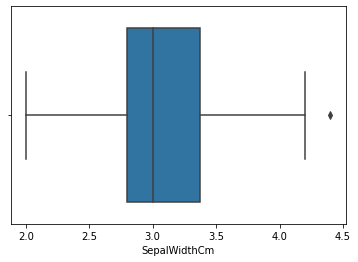

In [18]:
sns.boxplot(x='SepalWidthCm', data=veri)

In [19]:
for column in veri.columns[1:-1]:
    for specy in veri["Species"].unique():
        Specy_type = veri[veri["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # dropping outliers
        
        

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
Int64Index([13, 22, 24, 44], dtype='int64')
Int64Index([98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


<AxesSubplot:xlabel='SepalWidthCm'>

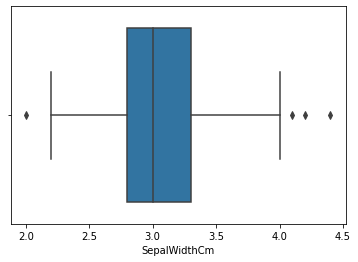

In [20]:
sns.boxplot(x='SepalWidthCm', data=veri)

In [21]:
for column in veri.columns[1:-1]:
    for specy in veri["Species"].unique():
        Specy_type = veri[veri["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # dropping outliers
        
        

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([109, 119], dtype='int64')
Int64Index([5, 14, 18, 20, 35], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


<AxesSubplot:xlabel='SepalWidthCm'>

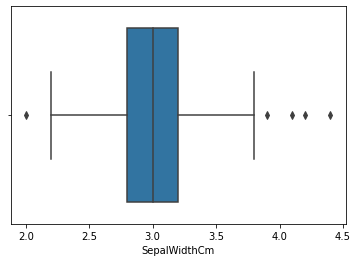

In [22]:
sns.boxplot(x='SepalWidthCm', data=veri)

In [23]:
for column in veri.columns[1:-1]:
    for specy in veri["Species"].unique():
        Specy_type = veri[veri["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # dropping outliers
        
        

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([15], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([106], dtype='int64')
Int64Index([33, 41], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([6, 9, 12, 16, 17, 19, 21, 26, 31, 32, 34, 37, 40, 45], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


<AxesSubplot:xlabel='SepalWidthCm'>

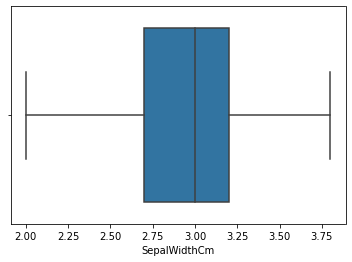

In [24]:
sns.boxplot(x='SepalWidthCm', data=veri)

In [25]:
veri = veri.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
veri.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Correlation On iris Classes')

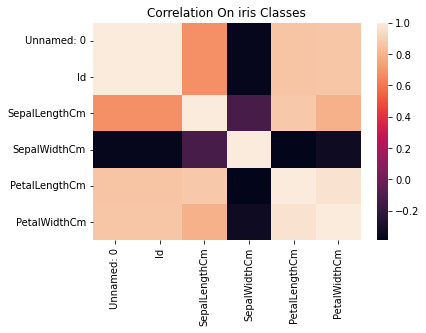

In [26]:
plt.figure(1)
sns.heatmap(veri.corr())
plt.title('Correlation On iris Classes')

In [27]:
X = veri.iloc[:,:-1]
y = veri.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 6  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
